The ANOVA approach allows for the analysis of the joint effect of two or more different factors each with different numner of groups. Let us include an additional factor given by the sex of the mice and ask: Is there an effect of sex when leptin groups are taken into account? 

Here there are two simultaneous questions: 

• Is there an effect of sex on the weight of the mice? • Is that effect different between leptin groups?

In [5]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://alejandro-isglobal.github.io/SDA/data/dataleptin.txt', sep=' ')
data

,weight,group,sex
0,27.67,Control,M
1,27.40,Control,M
2,25.77,Control,M
3,25.60,Control,M
4,25.03,Control,M
...,...,...,...
74,21.40,KOplus,F
75,29.50,KOplus,F
76,21.90,KOplus,F
77,23.70,KOplus,F


In [4]:
filtgroups = (data['group']=='leptinKO') | (data['group']=='KOplus')
filtered_data = data[filtgroups]
model = ols('weight ~ sex', data=filtered_data).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
sex,1.0,134.975026,134.975026,0.854439,0.361289
Residual,37.0,5844.862933,157.969268,NaN,NaN


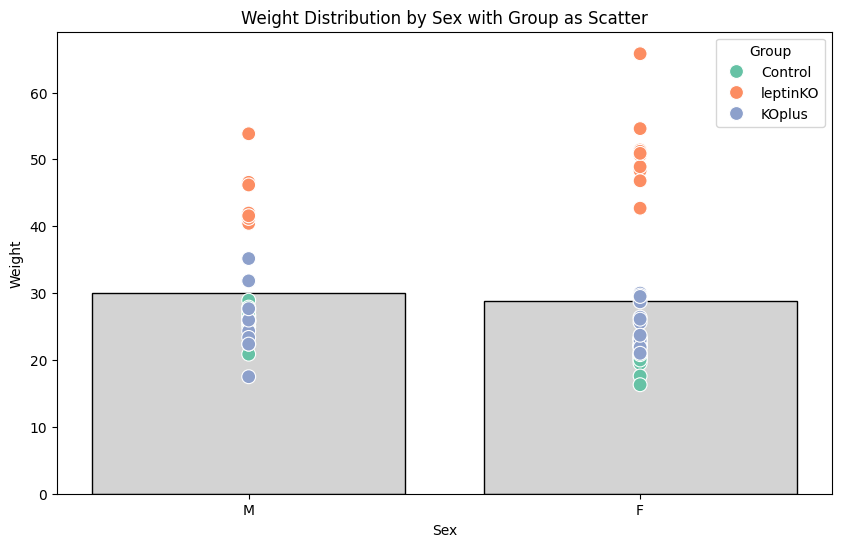

In [6]:
plt.figure(figsize=(10, 6))

sns.barplot(x='sex', y='weight', data=data, estimator='mean', errorbar=None, color='lightgray', edgecolor='black')
sns.scatterplot(x='sex', y='weight', hue='group', data=data, palette='Set2', s=100)

plt.title('Weight Distribution by Sex with Group as Scatter')
plt.xlabel('Sex')
plt.ylabel('Weight')

plt.legend(title='Group')
plt.show()